

# **Análisis Exploratorio de Datos (EDA) para el Proyecto Yelp**

El Análisis Exploratorio de Datos (EDA) es el proceso de explorar y comprender los datos antes de realizar análisis más avanzados. En este Jupyter notebook, realizaremos un EDA para los conjuntos de datos relacionados con Yelp, con el objetivo de identificar problemas potenciales y comprender mejor la estructura de los datos. A continuación se describen los pasos que seguiremos:

---

### **1. Exploración Inicial**
- **1.1. Carga del Archivo**: Cargaremos cada archivo en un DataFrame de pandas.
- **1.2. Dimensiones del DataFrame**: Determinaremos cuántas filas y columnas tiene cada DataFrame.
- **1.3. Tipos de Datos**: Revisaremos los tipos de datos para cada columna.
- **1.4. Muestra Rápida**: Observaremos las primeras y últimas filas para tener una idea general del contenido del DataFrame.



### **2. Análisis de Datos Cualitativos**
- **2.1. Valores Nulos**: Identificaremos columnas con valores faltantes y cuántos valores nulos hay.
- **2.2. Estadísticas Básicas**: Utilizaremos `describe()` para obtener estadísticas como media, mediana, desviación estándar, etc.
- **2.3. Valores Únicos**: Contaremos cuántos valores únicos hay en cada columna para entender su diversidad.



### **3. Análisis de Datos Cuantitativos**

- **3.1. Distribuciones**: Crearemos histogramas para visualizar la distribución de las columnas numéricas.
- **3.2. Correlaciones**: Analizaremos las correlaciones entre columnas numéricas para encontrar relaciones significativas.
- **3.3. Detección de Outliers**: Usaremos gráficos como boxplots para detectar valores atípicos.



### **4. Análisis de Datos Categóricos**
- **4.1. Distribución de Categorías**: Verificaremos la frecuencia de las categorías para entender su diversidad.
- **4.2. Relaciones entre Categorías**: Usaremos gráficos de barras para ver cómo se relacionan las categorías con otras variables.



### **5. Preguntas Clave**
- **5.1. Columnas Importantes**: Identificaremos las columnas más relevantes para el análisis futuro.
- **5.2. Patrones y Tendencias**: Buscaremos patrones o tendencias útiles para el análisis posterior.
- **5.3. Correlaciones**: Exploraremos correlaciones entre columnas para identificar relaciones significativas.

---

Al final de este EDA, esperamos tener una comprensión clara de nuestros datos, permitiéndonos planificar y ejecutar análisis más avanzados. Este proceso establecerá una base sólida para el resto del proyecto y asegurará que estamos trabajando con datos limpios y consistentes.

---


**IMPORTAMOS LIBRERIAS**

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **1. Exploración Inicial**

In [67]:
# Carga del archivo
business = pd.read_pickle("../../Yelp/raw_data_parquet/business.pkl")       # tiempo aproximado de carga 13.5s          | 116.4 MB


In [68]:
# Dimensiones
print("Dimensiones:", business.shape)

Dimensiones: (150346, 28)


Por algun motivo al momento de cargar el archivo business.pkl las columnas se estan duplicando.. en total deberian ser solo 14 columnas 

In [69]:
# Mostrar todas las columnas para verificar duplicados
print("Columnas del DataFrame:", business.columns)

# Identificar columnas duplicadas
columnas_duplicadas = business.columns[business.columns.duplicated()].unique()

print("Columnas duplicadas:", columnas_duplicadas)

Columnas del DataFrame: Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'business_id', 'name', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')
Columnas duplicadas: Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')


In [70]:
# Eliminar columnas duplicadas (manteniendo solo la primera aparición)
business_unique = business.loc[:, ~business.columns.duplicated()]

# Reasignar el DataFrame para mayor claridad
business = business_unique

# Verificar las columnas únicas
print("Columnas después de eliminar duplicados:", business.columns)


Columnas después de eliminar duplicados: Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')


In [71]:
# Vista Previa

# Dimensiones
print("Dimensiones:", business.shape)

business.head(3)



Dimensiones: (150346, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


Tomamos una muestra aleatoria para optimizar tiempos de procesamiento

In [72]:
# Tomar una muestra aleatoria del DataFrame
business_sample = business.sample(frac=0.1, random_state=42)  # 10% del DataFrame

# Dimensiones de la muestra
print("Dimensiones de la muestra:", business_sample.shape)

Dimensiones de la muestra: (15035, 14)


In [73]:
# Tipos de datos
print("Tipos de datos:", business_sample.dtypes)

Tipos de datos: business_id     object
name            object
address         object
city            object
state           object
postal_code     object
latitude        object
longitude       object
stars           object
review_count    object
is_open         object
attributes      object
categories      object
hours           object
dtype: object


In [74]:
business_sample['name'] = business_sample['name'].astype('category')
business_sample['address'] = business_sample['address'].astype('str') # quedo como object.. parece que es por los nulos 
business_sample['city'] = business_sample['city'].astype('category')
business_sample['state'] = business_sample['state'].astype('category')
business_sample['postal_code'] = business_sample['postal_code'].astype('category')
business_sample['latitude'] = business_sample['latitude'].astype('float')
business_sample['longitude'] = business_sample['longitude'].astype('float')
business_sample['stars'] = business_sample['stars'].astype('float')
business_sample['review_count'] = business_sample['review_count'].astype('int')
business_sample['is_open'] = business_sample['is_open'].astype('int')

# attributes categories hours no les cambie el tipo de dato, por que "object", que permite cualquier tipo de estructura, incluidos diccionarios.
# pero no se si se pueda hacer un explode para categorizarlas mejor luego... 

In [75]:
# Tipos de datos
print("Tipos de datos:", business_sample.dtypes)

Tipos de datos: business_id       object
name            category
address           object
city            category
state           category
postal_code     category
latitude         float64
longitude        float64
stars            float64
review_count       int64
is_open            int64
attributes        object
categories        object
hours             object
dtype: object


In [76]:
# Muestra las primeras filas
business_sample.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
91932,TacYUYhU3HpLHF9Rs6fW2w,Steps to Learning Montessori Preschool,6901 Phelps Rd,Goleta,PA,93117,34.423311,-119.870637,4.5,8,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Education, Elementary Schools, Child Care & Da...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
87608,RnExaICvIeXxFpbIKEqJsQ,Breeze Blow Dry Bar,9916 Clayton Rd,St. Louis,DE,63124,38.636716,-90.393139,4.0,81,0,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Hair Salons, Beauty & Spas, Hair Stylists, Ski...","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ..."
49133,pjtjBeZC3gvmtIiIQt-DFA,Impact Guns,11655 W Executive Dr,Boise,PA,83713,43.608700,-116.328000,3.0,39,1,"{'BusinessParking': '{'garage': False, 'street...","Gun/Rifle Ranges, Active Life","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."


### **2. Análisis de Datos Cualitativos**

In [77]:
# Conteo de valores nulos
business_sample.isnull().sum()

business_id        0
name               0
address            0
city               0
state              1
postal_code        0
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes      1429
categories         7
hours           2362
dtype: int64

In [78]:
# Estadísticas básicas
business_sample.describe(include='all')

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
count,15035,15035,15035,15035,15034,15035,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,13606,15028,12673
unique,15035,12944,14079,618,16,1236,NaN,NaN,NaN,NaN,NaN,8129,10556,7359
top,TacYUYhU3HpLHF9Rs6fW2w,Starbucks,,Philadelphia,PA,93101,NaN,NaN,NaN,NaN,NaN,{'BusinessAcceptsCreditCards': 'True'},"Beauty & Spas, Nail Salons","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
freq,1,75,530,1506,3428,203,NaN,NaN,NaN,NaN,NaN,954,112,668
mean,NaN,NaN,NaN,NaN,NaN,NaN,36.729305,-89.333728,3.599667,44.657333,0.797672,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,5.882303,14.889984,0.977936,111.390047,0.401749,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,27.558259,-120.083748,1.000000,5.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.195804,-90.350169,3.000000,8.000000,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,38.785722,-86.122370,3.500000,14.000000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,39.956084,-75.414647,4.500000,37.000000,1.000000,NaN,NaN,NaN


### **3. Análisis de Datos Cuantitativos**

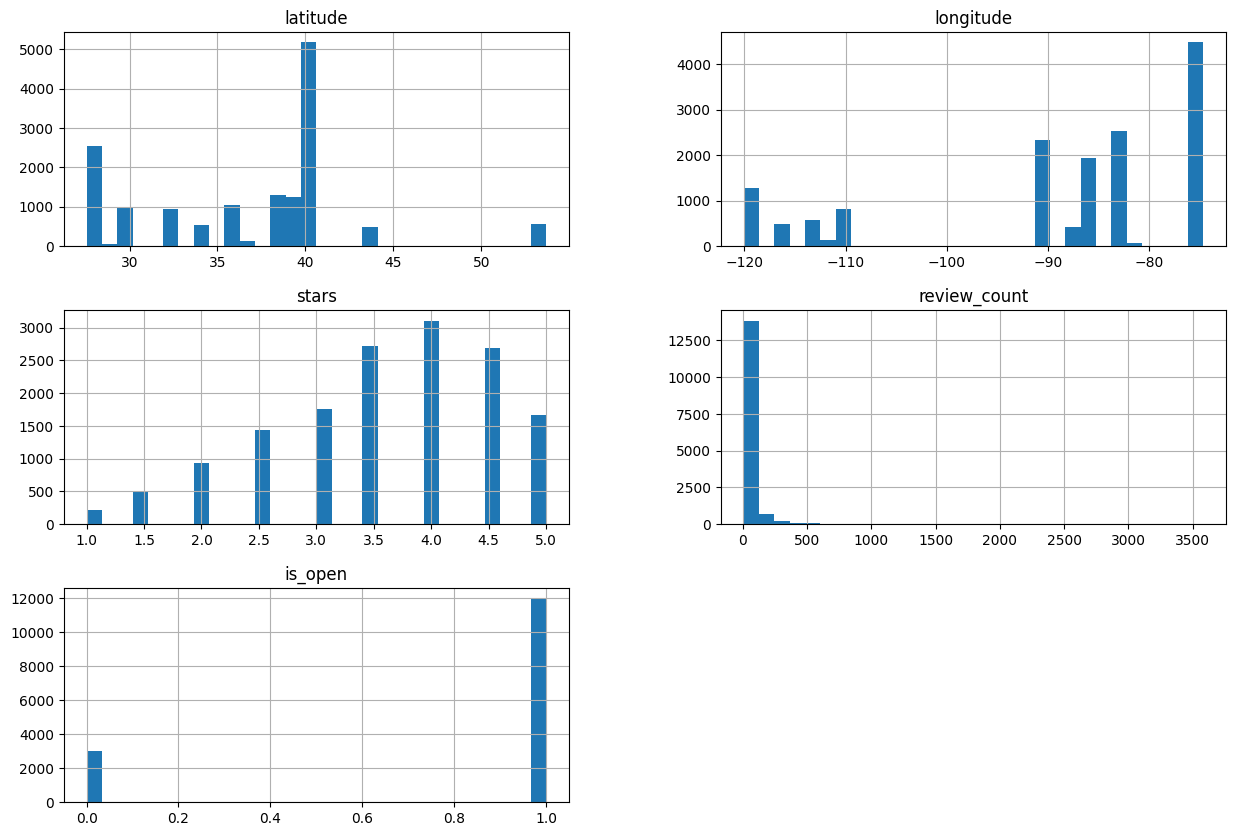

In [79]:
### 3. Análisis de Datos Cuantitativos

# Distribuciones 
# Histogramas
business_sample.hist(bins=30, figsize=(15, 10))
plt.show()


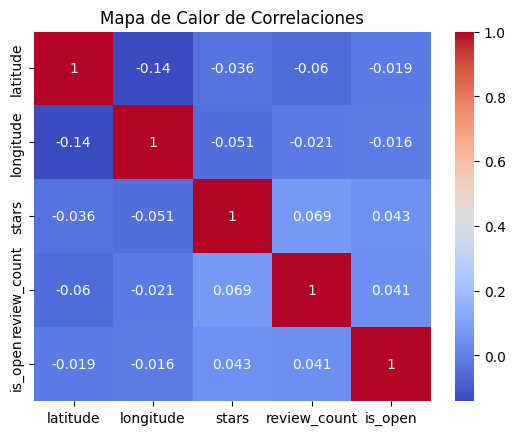

In [80]:
# Correlaciones 

# Seleccionamos solo las columnas numéricas
columnas_numericas = business_sample.select_dtypes(include=['number', 'float64', 'int64']).columns

# Calcular correlaciones solo con las columnas numéricas
correlaciones = business_sample[columnas_numericas].corr()

# Crear un mapa de calor para las correlaciones
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.title("Mapa de Calor de Correlaciones")
plt.show()


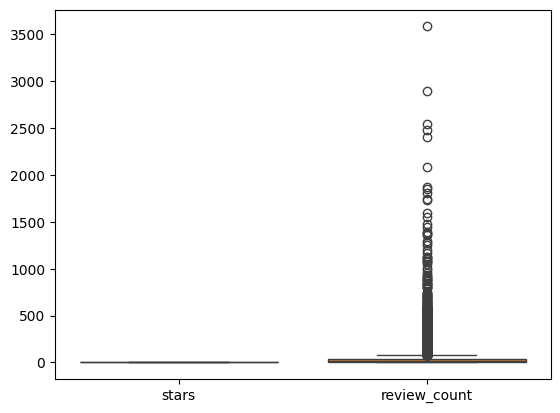

In [81]:
# Boxplots para outliers
sns.boxplot(data=business_sample[['stars', 'review_count']])
plt.show()

### **4. Análisis de Datos Categóricos**

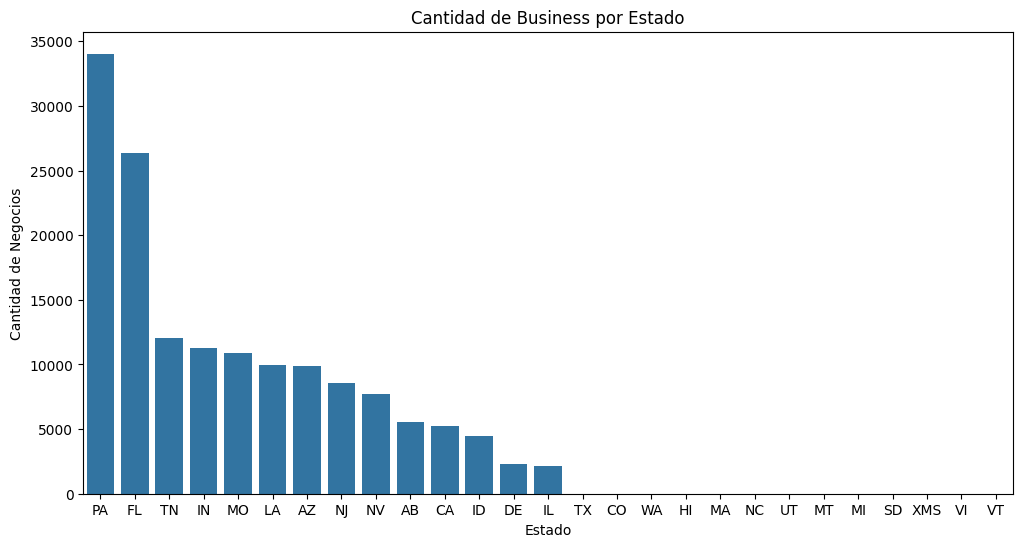

In [82]:
# Gráfico de barras para categorías

# Contar negocios por estado
business_by_state = business['state'].value_counts()

# Gráfico de barras para cantidad de business_id por state
plt.figure(figsize=(12, 6))
sns.barplot(x=business_by_state.index, y=business_by_state.values, order=business_by_state.index)
plt.title("Cantidad de Business por Estado")
plt.xlabel("Estado")
plt.ylabel("Cantidad de Negocios")
plt.show()


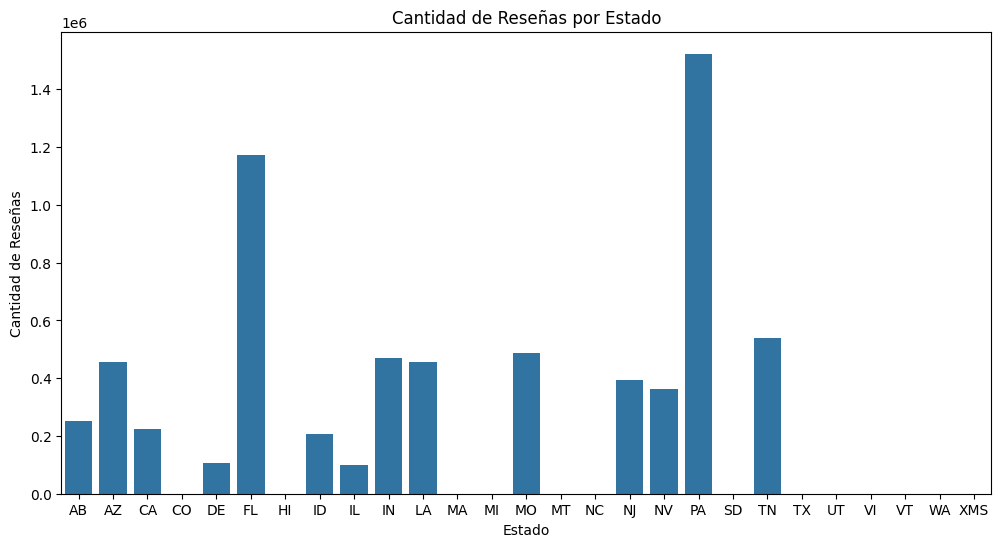

In [83]:
# Suma de review_count por estado
review_count_by_state = business.groupby('state')['review_count'].sum()

# Gráfico de barras para review_count por state
plt.figure(figsize=(12, 6))
sns.barplot(x=review_count_by_state.index, y=review_count_by_state.values, order=review_count_by_state.index)
plt.title("Cantidad de Reseñas por Estado")
plt.xlabel("Estado")
plt.ylabel("Cantidad de Reseñas")
plt.show()


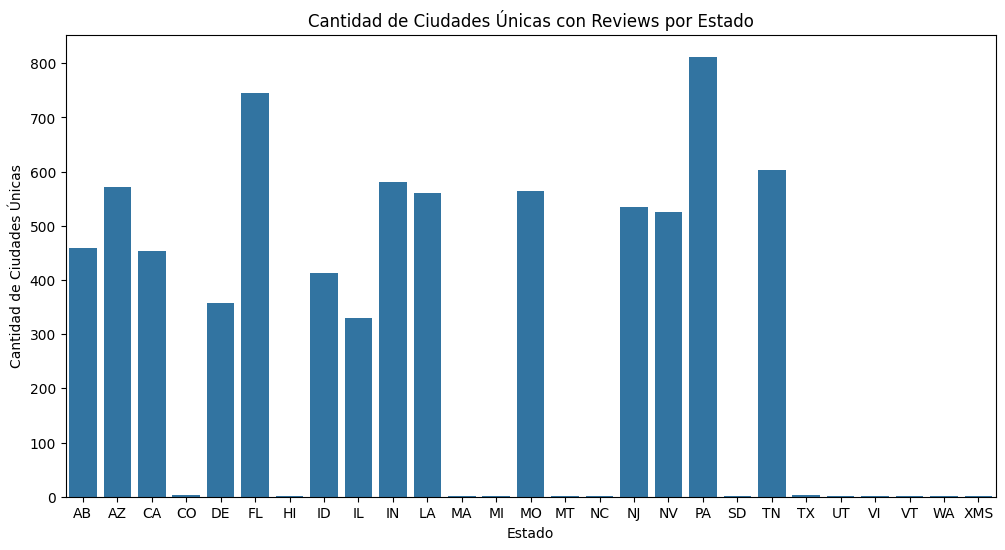

In [84]:
# Contar ciudades únicas por estado
city_count_by_state = business.groupby('state')['city'].nunique()

# Gráfico de barras para cantidad de ciudades únicas por estado
plt.figure(figsize=(12, 6))
sns.barplot(x=city_count_by_state.index, y=city_count_by_state.values, order=city_count_by_state.index)
plt.title("Cantidad de Ciudades Únicas con Reviews por Estado")
plt.xlabel("Estado")
plt.ylabel("Cantidad de Ciudades Únicas")
plt.show()


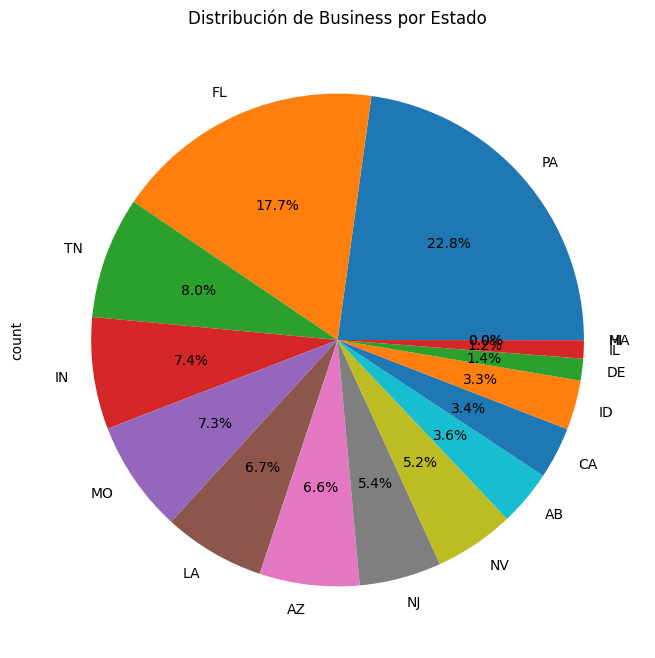

In [85]:
# Gráfico de pastel para mostrar la distribución de negocios por estado
business_sample['state'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title("Distribución de Business por Estado")
plt.show()


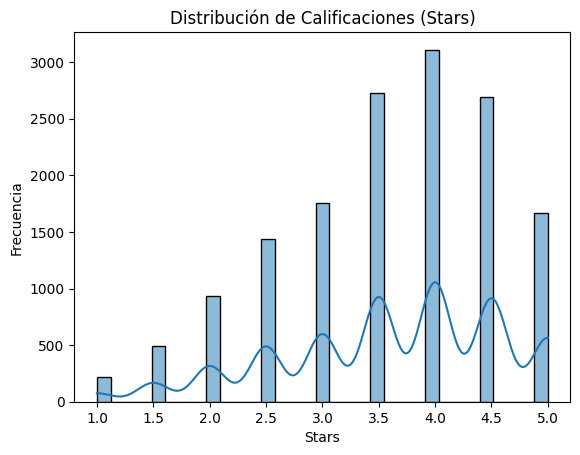

In [86]:

# Histograma para 'stars'
sns.histplot(business_sample['stars'], kde=True)
plt.xlabel("Stars")
plt.ylabel("Frecuencia")
plt.title("Distribución de Calificaciones (Stars)")
plt.show()



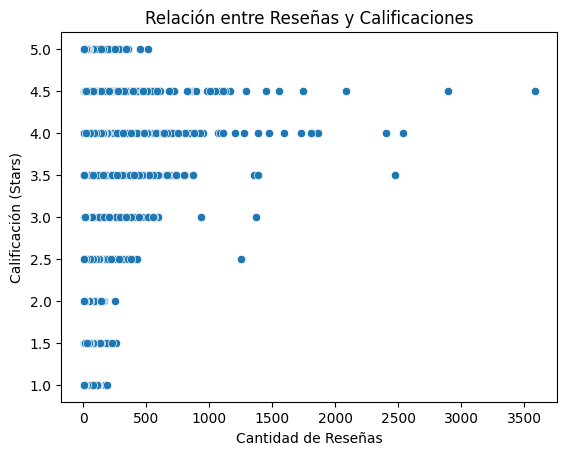

In [87]:
sns.scatterplot(x='review_count', y='stars', data=business_sample)
plt.xlabel("Cantidad de Reseñas")
plt.ylabel("Calificación (Stars)")
plt.title("Relación entre Reseñas y Calificaciones")
plt.show()



### **5. Preguntas Clave**
- **5.1. Columnas Importantes**: Identificaremos las columnas más relevantes para el análisis futuro.
- **5.2. Patrones y Tendencias**: Buscaremos patrones o tendencias útiles para el análisis posterior.
- **5.3. Correlaciones**: Exploraremos correlaciones entre columnas para identificar relaciones significativas.